In [1]:
import sqlite3


In [5]:
import sqlite3
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()
cursor.execute("CREATE TABLE IF NOT EXISTS sales (product TEXT, quantity INT, price REAL)")
conn.commit()


In [7]:
import sqlite3

# Step 1: Connect to database (creates it if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Step 2: Create a sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Step 3: Insert sample data (only once!)
sample_data = [
    ('Product A', 10, 15.0),
    ('Product B', 5, 25.0),
    ('Product A', 7, 15.0),
    ('Product C', 3, 40.0),
    ('Product B', 2, 25.0),
    ('Product C', 4, 40.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
conn.close()


In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 4: Connect to database
conn = sqlite3.connect("sales_data.db")

# Step 5: Run SQL query
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
conn.close()

# Step 6: Print the results
print("Sales Summary:\n")
print(df)


Sales Summary:

     product  total_qty  revenue
0  Product A         17    255.0
1  Product B          7    175.0
2  Product C          7    280.0


<Figure size 800x500 with 0 Axes>

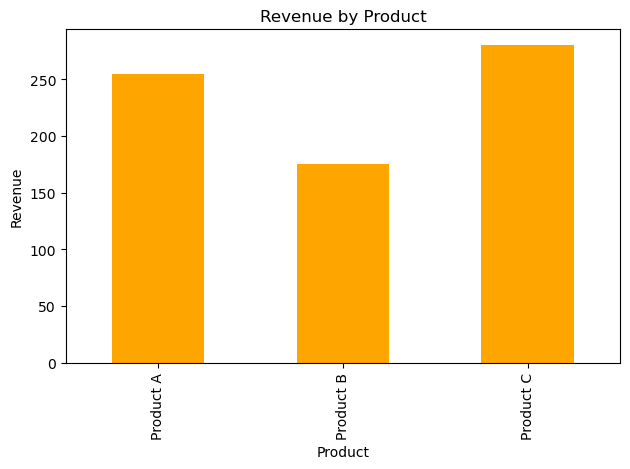

In [11]:
# Step 7: Plot
plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='orange')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional: Save chart
plt.show()


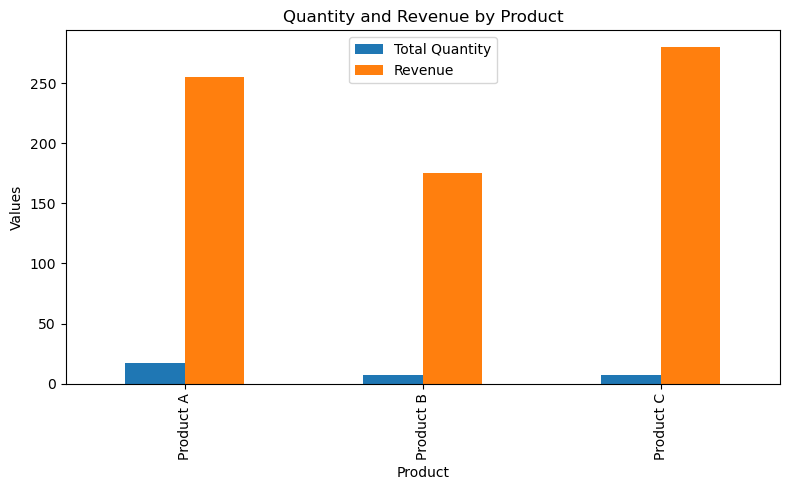

In [21]:
df.plot(kind='bar', x='product', y=['total_qty', 'revenue'], figsize=(8, 5))
plt.title("Quantity and Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Values")
plt.legend(["Total Quantity", "Revenue"])
plt.tight_layout()
plt.show()


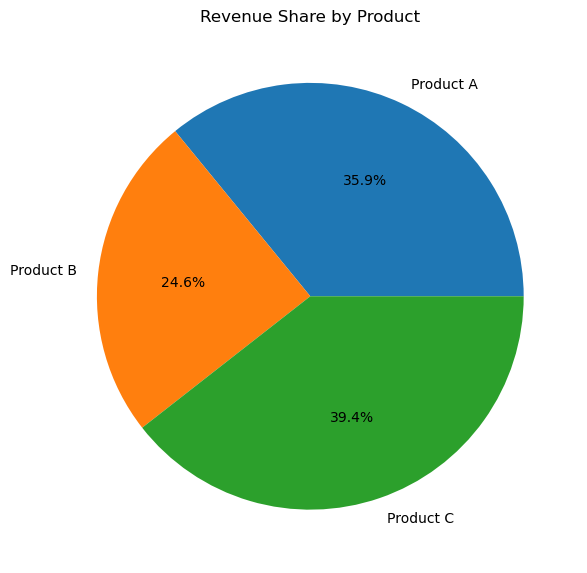

In [23]:
df.set_index('product')['revenue'].plot.pie(autopct='%1.1f%%', figsize=(6, 6))
plt.title("Revenue Share by Product")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [27]:
df.to_excel("sales_summary.xlsx", index=False)
